# Computational Mathematics with SageMath

# Using Scipy and Sympy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1

Use odeint function from scipy to solve an initial value ordinary differential equation

$$y^{\prime \prime}+3 y^{\prime}+2 y=\sin (2 x), y(0)=0, y^{\prime}(0)=0$$

and hence plot the solution curve.

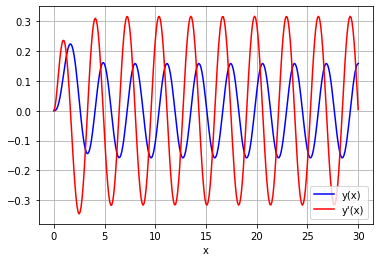

In [2]:
from scipy.integrate import odeint

Y0 = [0, 0]

def system_of_first_order(Y, x):
    y, yp = Y
    dYdx = [yp, -3*yp-2*y+np.sin(2*x)]
    return dYdx

x = np.linspace(0, 30, 301)

sol = odeint(system_of_first_order, Y0, x)

plt.plot(x, sol[:, 0], 'b', label='y(x)')
plt.plot(x, sol[:, 1], 'r', label="y'(x)")
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Exercice 2

Use the function ‘curve_fit’ to fit the curve $y = ax^2 + bx + c$ to the set of points $$ \{(−5.0, 75.0),(−4.0, 45.0),(−3.0, 30.0),(−2.0, 22.0),(−1.0, 8.0),(0.0, 15.0), (1.0, 14.0),(2.0, 17.0),(3.0, 20.0),(4.0, 25.0),(5.0, 35.0)\}$$

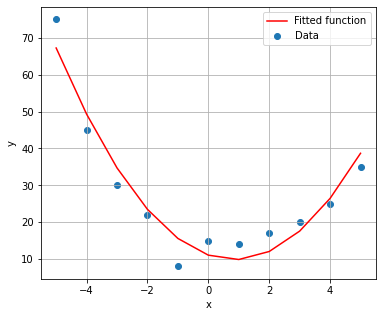

In [3]:
from scipy.optimize import curve_fit

data = np.array([(-5.0,75.0),(-4.0,45.0),(-3.0,30.0),(-2.0,22.0),(-1.0,8.0),(0.0,15.0),(1.0,14.0),(2.0,17.0),(3.0,20.0),(4.0,25.0),(5.0,35.0)])
data = list(zip(*data))

xdata=np.array(data[0])
ydata=np.array(data[1])


def test_func(x, a, b, c):
    return a*x**2 + b*x + c

coeffs, params_covariance = curve_fit(test_func, xdata, ydata, p0=[2, 2, 2])

yfitted = test_func(xdata, coeffs[0], coeffs[1], coeffs[2])

plt.figure(figsize=(6, 5))
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, yfitted, label='Fitted function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.grid()
plt.show()

## Exercice 3

Find two zeros of the function $f(x) = e^{-\frac{x}{2}} - x \sin x$, using the bisection method and Newton-Raphson method.

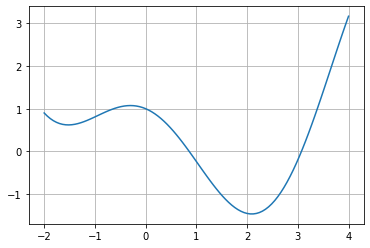

In [4]:
from scipy import optimize

f = lambda x: np.exp(-x/2)-x*np.sin(x)

x = np.linspace(-2,4,100)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.show()

In [5]:
# Using bisection method

root1 = optimize.bisect(f, 0, 1)
root2 = optimize.bisect(f, 3, 3.5)
print("First root : ", root1)
print("Second root : ", root2)

First root :  0.8592484776254423
Second root :  3.0714373513746978


In [6]:
# Using Newton-Raphson method

root1 = optimize.newton(f, 1, fprime=lambda x: -1/2*np.exp(-x/2)-np.sin(x)-x*np.cos(x))
root2 = optimize.newton(f, 4, fprime=lambda x: -1/2*np.exp(-x/2)-np.sin(x)-x*np.cos(x))
print("First root : ", root1)
print("Second root : ", root2)

First root :  0.8592484776265296
Second root :  3.071437351374662


## Exercice 4

Consider an $n$ -th degree polynomial $p(x)=a_{n} x^{n}+a_{n-1} x^{n-1}+\cdots a_{1} x+a_{0} .$ 

Let $\alpha_{1}, \alpha_{2}, \alpha_{3}, \ldots, \alpha_{n}$ be roots of $p(x)=0$. 

Then we have the following relations

(i) $\sum_{i=1}^{n} \alpha_{i}=-\frac{a_{n-1}}{a_{n}}$.

(ii) $\sum_{i<j} \alpha_{i} \alpha_{j}=\frac{a_{n-2}}{a_{n}}$

(iii) $\sum_{i<j<k} \alpha_{i} \alpha_{j} \alpha_{k}=-\frac{a_{n-3}}{a_{n}}$.

Define an array, say, 'coeffs' of coefficients of a polynomial of degree $6 .$ Use numpy.roots to find the roots of the polynomial with given coefficients. Hence verify the above three relations.

In [7]:
coeffs = [-12, 15, 1, 20.5, 1, 3, 1]
r = np.roots(coeffs)
print(r)

[ 1.83940545+0.j         -0.30082157+0.87613838j -0.30082157-0.87613838j
  0.1294886 +0.44407827j  0.1294886 -0.44407827j -0.2467395 +0.j        ]


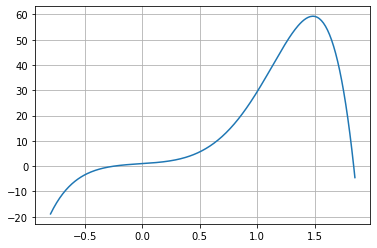

In [8]:
a = -0.8
b = 1.85
x = np.linspace(a, b, 301)
y = sum([coeffs[i]*x**(len(coeffs)-i-1) for i in range(len(coeffs))])
plt.plot(x,y)
plt.grid()
plt.show()

In [9]:
# sum (i)
s1_lhs = sum(r)
s1_rhs = -coeffs[1]/coeffs[0]

print(s1_lhs)
print(s1_rhs)
np.isclose(s1_lhs, s1_rhs, 1e-8)

(1.2500000000000013+0j)
1.25


True

In [10]:
# sum (ii)
s2_lhs = sum([r[i]*r[j] for j in range(len(r)) for i in range(j)])
s2_rhs = coeffs[2]/coeffs[0]

print(s2_lhs)
print(s2_rhs)
np.isclose(s2_lhs, s2_rhs, 1e-8)

(-0.0833333333333334-1.1102230246251565e-16j)
-0.08333333333333333


True

In [11]:
# sum (iii)
s2_lhs = sum([r[i]*r[j]*r[k] for k in range(len(r)) for j in range(k) for i in range(j)])
s2_rhs = -coeffs[3]/coeffs[0]

print(s2_lhs)
print(s2_rhs)
np.isclose(s2_lhs, s2_rhs, 1e-8)

(1.7083333333333386-1.734723475976807e-18j)
1.7083333333333333


True